In [1]:
from sklearn.linear_model import LinearRegression,SGDRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor

In [2]:
import  numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import seaborn
import matplotlib.pyplot as plt

In [4]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import PolynomialFeatures

In [22]:
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error

In [10]:
x_train=pd.read_csv('data/cleaned_train_set.csv')

In [14]:
x_train.drop(columns=['Unnamed: 0'],inplace=True)

In [16]:
x_train.isna().sum()

MSSubClass                0
MSZoning                  0
LotFrontage               0
LotArea                   0
Street                    0
                       ... 
Neighborhood_Somerst      0
Neighborhood_StoneBr      0
Neighborhood_Timber       0
Neighborhood_Veenker      0
SalePrice               241
Length: 99, dtype: int64

In [17]:
x_train.dropna(inplace=True,axis=0)

In [18]:
x_train.isna().sum()

MSSubClass              0
MSZoning                0
LotFrontage             0
LotArea                 0
Street                  0
                       ..
Neighborhood_Somerst    0
Neighborhood_StoneBr    0
Neighborhood_Timber     0
Neighborhood_Veenker    0
SalePrice               0
Length: 99, dtype: int64

In [19]:
x_feat=[col for col in x_train.columns if col not in ['SalePrice']]
y_feat=['SalePrice']

In [20]:
X_train=x_train[x_feat]
y_train=x_train[y_feat]

In [21]:
cleaned_test_set=pd.read_csv('data/cleaned_test_set.csv')
cleaned_test_set.drop(columns=['Unnamed: 0'],inplace=True)
cleaned_test_set.dropna(inplace=True,axis=0)
X_test=cleaned_test_set[x_feat]
y_test=cleaned_test_set[y_feat]

In [26]:
def show_metrics(model,X,y,train=True):
    y_predict=model.predict(X)
    r2=r2_score(y,y_predict)
    mse=mean_squared_error(y,y_predict)
    rmse=np.sqrt(mse)
    if train:
        print(f'Model metrics for {model} on trainset')
    else:
        print(f'Model metrics for {model} on testset')
    print('r2 score   :',r2)
    print('mse        :',mse)
    print('rmse       :',rmse)


In [28]:
linear_reg=LinearRegression(fit_intercept=True)
linear_reg.fit(X_train,y_train)
show_metrics(linear_reg,X_train,y_train)
show_metrics(linear_reg,X_test,y_test,False)

Model metrics for LinearRegression() on trainset
r2 score   : 0.11679622127291456
mse        : 4849874972.593
rmse       : 69641.0437356664
Model metrics for LinearRegression() on testset
r2 score   : 0.11679622127291456
mse        : 4849874972.593
rmse       : 69641.0437356664


In [30]:
linear_reg.score(X_train,y_train)

0.11679622127291456

In [29]:
sgd_reg=SGDRegressor()
sgd_reg.fit(X_train,y_train)
show_metrics(sgd_reg,X_train,y_train)
show_metrics(sgd_reg,X_test,y_test,False)

Model metrics for SGDRegressor() on trainset
r2 score   : -1.0996043224405384e+24
mse        : 6.03818010249632e+33
rmse       : 7.770572760418835e+16
Model metrics for SGDRegressor() on testset
r2 score   : -1.0996043224405384e+24
mse        : 6.03818010249632e+33
rmse       : 7.770572760418835e+16


In [33]:
dec_tree=DecisionTreeRegressor(max_depth=30)
dec_tree.fit(X_train,y_train)
show_metrics(dec_tree,X_train,y_train)
show_metrics(dec_tree,X_test,y_test,False)

Model metrics for DecisionTreeRegressor(max_depth=30) on trainset
r2 score   : 0.9999645273298128
mse        : 194788.58616283318
rmse       : 441.34859936657006
Model metrics for DecisionTreeRegressor(max_depth=30) on testset
r2 score   : 0.9999645273298128
mse        : 194788.58616283318
rmse       : 441.34859936657006


In [36]:
rnd_forest=RandomForestRegressor(n_estimators=100)
rnd_forest.fit(X_train,y_train)
show_metrics(rnd_forest,X_train,y_train)
show_metrics(rnd_forest,X_test,y_test,False)

Model metrics for RandomForestRegressor() on trainset
r2 score   : 0.8418332089829474
mse        : 868530207.5524576
rmse       : 29470.83656010561
Model metrics for RandomForestRegressor() on testset
r2 score   : 0.8418332089829474
mse        : 868530207.5524576
rmse       : 29470.83656010561


In [38]:
adaboost=AdaBoostRegressor(n_estimators=100)
adaboost.fit(X_train,y_train)
show_metrics(adaboost,X_train,y_train)
show_metrics(adaboost,X_test,y_test,False)

Model metrics for AdaBoostRegressor(n_estimators=100) on trainset
r2 score   : 0.01745246419487667
mse        : 5395394379.032287
rmse       : 73453.34831736595
Model metrics for AdaBoostRegressor(n_estimators=100) on testset
r2 score   : 0.01745246419487667
mse        : 5395394379.032287
rmse       : 73453.34831736595


In [39]:
gradient_boosted=GradientBoostingRegressor()
gradient_boosted.fit(X_train,y_train)
show_metrics(gradient_boosted,X_train,y_train)
show_metrics(gradient_boosted,X_test,y_test,False)

Model metrics for GradientBoostingRegressor() on trainset
r2 score   : 0.47134714349077966
mse        : 2902954357.452002
rmse       : 53879.07160903946
Model metrics for GradientBoostingRegressor() on testset
r2 score   : 0.47134714349077966
mse        : 2902954357.452002
rmse       : 53879.07160903946


In [40]:
knn_reg=KNeighborsRegressor(n_neighbors=11)
knn_reg.fit(X_train,y_train)
show_metrics(knn_reg,X_train,y_train)
show_metrics(knn_reg,X_test,y_test,False)

Model metrics for KNeighborsRegressor(n_neighbors=11) on trainset
r2 score   : 0.10538313342374861
mse        : 4912546861.519303
rmse       : 70089.56314259137
Model metrics for KNeighborsRegressor(n_neighbors=11) on testset
r2 score   : 0.10538313342374861
mse        : 4912546861.519303
rmse       : 70089.56314259137


## From the above, random forest and Decision tree regressor are doing good however i would select random forest regressor provided its ability of ensembling and stability of not over fitting.
### there are issues with importing Xgboost so that is not implemented here.

In [50]:
param_grid={
    'n_estimators':[100,150,200],
    'max_depth':[3,5,10,20,40,50]

}

In [43]:
randomforest=RandomForestRegressor()

In [51]:
gridsearch=GridSearchCV(randomforest,param_grid,scoring='neg_mean_squared_error',cv=10)

In [52]:
gridsearch.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [3, 5, 10, 20, 40, 50],
                         'n_estimators': [100, 150, 200]},
             scoring='neg_mean_squared_error')

In [53]:
gridsearch.best_params_

{'max_depth': 3, 'n_estimators': 150}

In [54]:
best_estimator=gridsearch.best_estimator_

In [55]:
show_metrics(best_estimator,X_train,y_train)
show_metrics(best_estimator,X_test,y_test,False)

Model metrics for RandomForestRegressor(max_depth=3, n_estimators=150) on trainset
r2 score   : 0.10316654565064665
mse        : 4924718654.512327
rmse       : 70176.33970586046
Model metrics for RandomForestRegressor(max_depth=3, n_estimators=150) on testset
r2 score   : 0.10316654565064665
mse        : 4924718654.512327
rmse       : 70176.33970586046


## this best estimator is not resulting with hight mse and rmse. so i will go with decision tree regressor

In [56]:
import pickle

In [64]:
dec_tree.predict(np.array(X_train.iloc[0,:]).reshape(1,-1))

array([208500.])

In [67]:
y_train.iloc[0,:]

SalePrice    208500.0
Name: 0, dtype: float64

In [70]:
pickle.dump(dec_tree,open('models/predictor.pkl','wb'))

In [71]:
y_test_pred=dec_tree.predict(X_test)

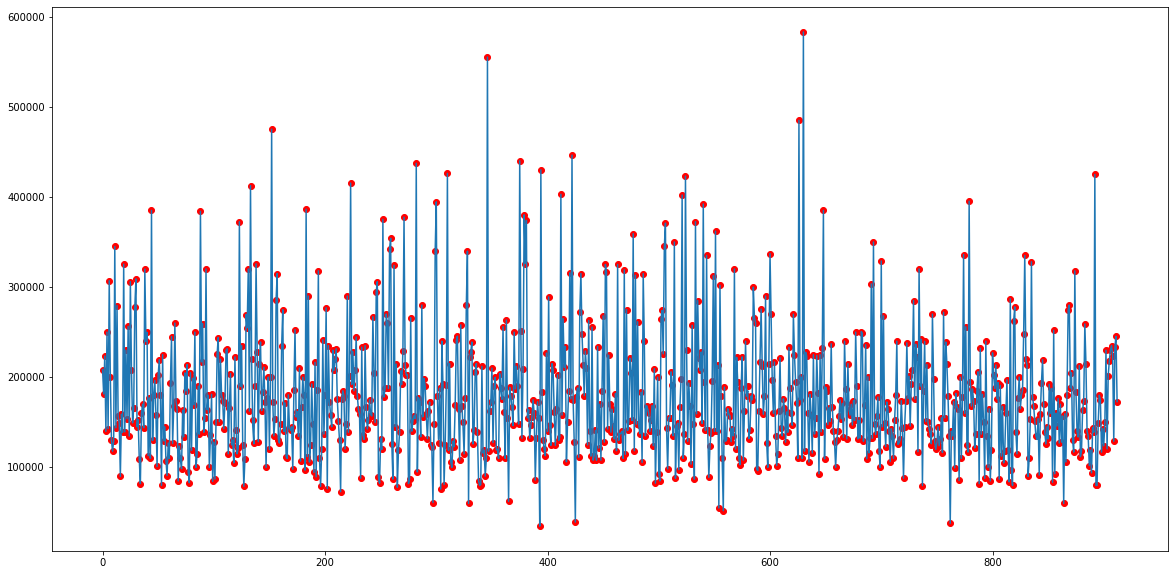

In [88]:
plt.figure(figsize=(20,10))
plt.scatter(x=range(len(y_test)),y=y_test,c='r')
plt.plot(y_test_pred)
